# Move files around

In [1]:
import os
import shutil

# define directory paths
base_path = "C-NMC_Leukemia1"
training_data_path = os.path.join(base_path, "training_data")
all_folders = ["fold_0/all", "fold_1/all", "fold_2/all"]
hem_folders = ["fold_0/hem", "fold_1/hem", "fold_2/hem"]
new_all_path = os.path.join(training_data_path, "new_all")
new_hem_path = os.path.join(training_data_path, "new_hem")

In [2]:
# create new directories
os.makedirs(new_all_path, exist_ok=True)
os.makedirs(new_hem_path, exist_ok=True)

In [3]:
# move all image files from 'all' folders to 'new_all' directory
for folder_path in all_folders:
    folder = os.path.join(training_data_path, folder_path)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        shutil.move(file_path, new_all_path)
        
print("Image files moved successfully.")

Image files moved successfully.


In [4]:
# move all image files from 'hem' folders to 'new_hem' directory
for folder_path in hem_folders:
    folder = os.path.join(training_data_path, folder_path)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        shutil.move(file_path, new_hem_path)
        
print("Image files moved successfully.")

Image files moved successfully.


In [5]:
# remove all the empty directories after moving the images
shutil.rmtree(training_data_path+'/fold_0')
shutil.rmtree(training_data_path+'/fold_1')
shutil.rmtree(training_data_path+'/fold_2')

# Image Preprocessing

In [7]:
# read Hem images from disk and store them in an array
import numpy as np
from skimage import io
from PIL import Image


hem_in_list=[]

hem_images_paths = os.listdir(new_hem_path)
for i, image_name in enumerate(hem_images_paths):
    if(image_name.split('.')[1] == 'bmp'):
        image = io.imread(new_hem_path+'/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((210,210)) #210x210
        hem_in_list.append(np.array(image))

hem_in_array = np.array(hem_in_list)

In [8]:
# read ALL images from disk and store them in an array
all_in_list=[]

all_images_paths = os.listdir(new_all_path)
for i, image_name in enumerate(all_images_paths):
    if(image_name.split('.')[1] == 'bmp'):
        image = io.imread(new_all_path+'/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((210,210)) #210x210
        all_in_list.append(np.array(image))

all_in_array = np.array(all_in_list)

In [10]:
print(f"No. of Hem images: {len(hem_in_array)}")
print(f"No. of ALL images: {len(all_in_array)}")

No. of Hem images: 3389
No. of ALL images: 7272


## Crop the images ✂️

In [14]:
from skimage.transform import resize
import cv2 as cv
def crop(arr):
    cropped_images_list=[]
    for each_img in arr:
        gray = cv.cvtColor(each_img, cv.COLOR_BGR2GRAY)
        # threshold 
        thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
        hh, ww = thresh.shape


        # make bottom 2 rows black where they are white the full width of the image
        thresh[hh-3:hh, 0:ww] = 0

        # get bounds of white pixels
        white = np.where(thresh==255)
        xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])
        #print(xmin,xmax,ymin,ymax)

        # crop the image at the bounds adding back the two blackened rows at the bottom
        cropped_img = each_img[ymin:ymax+3, xmin:xmax]
        resized_img = resize(cropped_img, (150, 150), anti_aliasing=True)
        cropped_images_list.append(resized_img)
    
    cropped_images_array=np.array(cropped_images_list)
    del cropped_images_list
    return cropped_images_array

In [15]:
#crop ALL and Hem images
cropped_all_in_array = crop(all_in_array)
cropped_hem_in_array = crop(hem_in_array)

## Visualize Images before and after cropping 

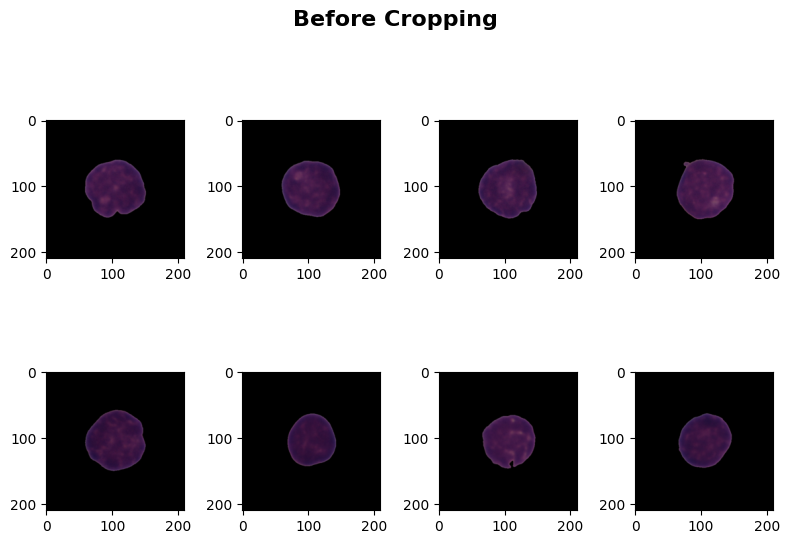

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i in range(8):
        ax.imshow(hem_in_array[i], cmap='gray')
    else:
        ax.axis('off')
fig.suptitle('Before Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

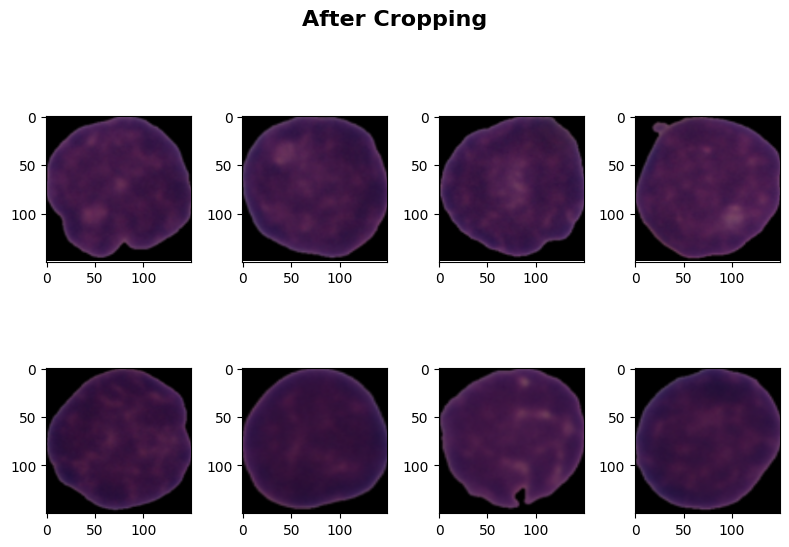

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i in range(8):
        ax.imshow(cropped_hem_in_array[i], cmap='gray')
    else:
        ax.axis('off')
fig.suptitle('After Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

# Save cropped images to drive

In [19]:
folder = "C-NMC_Leukemia_Cropped" # specify the path to your image folder here
all_folder = os.path.join(folder,'all_cropped')
hem_folder = os.path.join(folder,'hem_cropped')

# create new directories
os.makedirs(folder, exist_ok=True)
os.makedirs(all_folder, exist_ok=True)
os.makedirs(hem_folder, exist_ok=True)

In [21]:
# loop through the images and save them to the folder
for i, img in enumerate(cropped_all_in_array):
    # Convert the NumPy array to a PIL Image object
    pil_img = Image.fromarray((img * 255).astype(np.uint8))

    # Save the image with a new name based on its index in the array
    output_path = os.path.join(all_folder, f"image_{i}.jpg")
    pil_img.save(output_path)

In [22]:
# loop through the images and save them to the folder
for i, img in enumerate(cropped_hem_in_array):
    # Convert the NumPy array to a PIL Image object
    pil_img = Image.fromarray((img * 255).astype(np.uint8))

    # Save the image with a new name based on its index in the array
    output_path = os.path.join(hem_folder, f"image_{i}.jpg")
    pil_img.save(output_path)